In [1]:
import pickle
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
from collections import defaultdict

with open('downloads_per_day.pkl', 'rb') as pkl:
    date_string_dict = pickle.load(pkl)

date_dict = defaultdict(int)
for day, count in date_string_dict.items():
    date_dict[datetime.strptime(day, '%Y-%m-%d')] = count 



In [2]:
# month count
month_count = [0 for i in range(12)]
month_count = defaultdict(int)
for d, c in date_dict.items():
    month_count[d.month] += c

In [3]:
# date range
current = min(date_dict.keys())
stop = max(date_dict.keys())
step = timedelta(days=1)

#create range
x_day = []
y_val = []

#month range
months = []
m_split = []
while current <= stop:
    x_day.append(current)
    y_val.append(date_dict[current])
    if current.day == 15:
        months.append(current)
    if current.day == 1:
        m_split.append(current)
    current += step

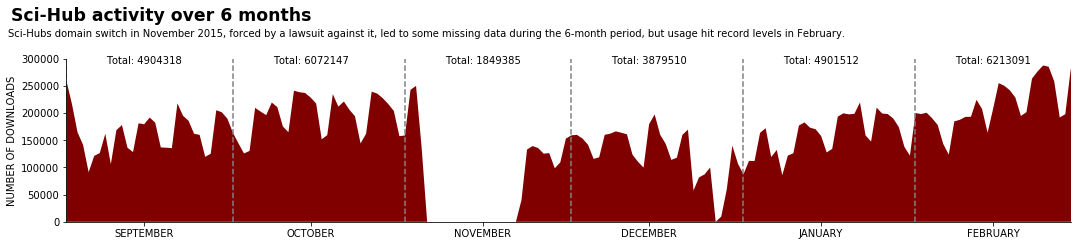

In [4]:
fig = plt.figure(figsize=(18,3))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.ticklabel_format(axis='y', style='sci')

plt.suptitle('Sci-Hub activity over 6 months', x=.198, y=1.12, fontsize='xx-large', fontweight='bold')
plt.figtext(x=0.08, y=.98, s='Sci-Hubs domain switch in November 2015, forced by a lawsuit against it, ' \
                            + 'led to some missing data during the 6-month period, but usage hit ' \
                            + 'record levels in February.')


plt.fill_between(x_day, y_val, 0, facecolor='#800000')
plt.ylabel('NUMBER OF DOWNLOADS')
plt.xlim((x_day[0],x_day[-2]))
plt.ylim((0,300000))
plt.xticks(months, ['SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER','JANUARY','FEBRUARY']);

for i in m_split:
    ax.axvline(i, color='grey', linestyle='--')
for mid_month in months:
    ax.text(mid_month, 290000, 'Total: {}'.format(month_count[mid_month.month]), horizontalalignment='center')


In [5]:
fig.savefig('overtime.png')